In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.set_printoptions(linewidth=95, edgeitems=5)
sns.set_theme(style = 'white', palette = 'colorblind')
pal = sns.color_palette('colorblind')
import plotly.express as px
import time
pd.set_option('display.max_rows', 100)
from scipy.stats import shapiro
plt.style.use('ggplot')
from statsmodels.graphics.gofplots import qqplot
import re
import datetime
import math

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

### Importing the training and testing dataset

In [3]:
df_train = pd.read_csv('LifeExpectancyData.csv')

### Let's explore our data

In [4]:
df_train.head()

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0     0.01               71.279624         65.0      1154   19.1  ...    6.0   
1     0.01               73.523582         62.0       492   18.6  ...   58.0   
2     0.01               73.219243         64.0       430   18.1  ...   62.0   
3     0.01               78.184215         67.0      2787   17.6  ...   67.0   
4     0.01                7.097109         68.0      3013   17.2  ...   68.0   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 21 columns]

In [5]:
df_train.columns 

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Columns Description :
- 2.Year: Year
- 3.Status : Developed or Developing
- 4.Life expectancy in age
- 5.Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- 6.Number of Infant Deaths per 1000 population
- 7.Alcohol - Recorded per capita (15+) alcohol consumption (in liters of pure alcohol)
- 8.Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- 9.Hepatitis B immunization coverage among 1-year-olds (%)
- 10.Measles - number of reported cases per 1000 population
- 12.Average Body Mass Index of entire population
- 12.Number of under-five deaths per 1000 population
- 13.Polio (Pol3) immunization coverage among 1-year-olds (%)
- 14.General government expenditure on health as a percentage of total government expenditure (%)
- 15.Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- 16.Deaths per 1000 live births HIV/AIDS (0-4 years)
- 17.Gross Domestic Product per capita (in USD)
- 18.Population of the country
- 19.Prevalence of thinness among children and adolescents for Age 1 to 19 (%)
- 20.Prevalence of thinness among children for Age 5 to 9 (%)
- 21.Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- 22.Number of years of Schooling (years)

In [6]:
df_train.isna().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df_train.duplicated().sum()

0

In [8]:
df_train.shape

(2938, 21)

As we can see, we have a lot of missing values so let's perform a simple description to decide on the strategy for those missing values

In [9]:
description = pd.DataFrame(index = list(df_train))
description['count'] = df_train.count()
description['nunique'] = df_train.nunique()
description['type'] = df_train.dtypes
description['missing_values'] = df_train.isna().sum()
description['missing_values_%']  = df_train.loc[:, df_train.isna().any()].isna().mean() * 100
description = pd.concat([description, df_train.describe().T.drop('count', axis = 1)], axis = 1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
description

count  nunique     type  missing_values  \
Year                              2938       16    int64               0   
Status                            2938        2   object               0   
Life expectancy                   2928      362  float64              10   
Adult Mortality                   2928      425  float64              10   
infant deaths                     2938      209    int64               0   
Alcohol                           2744     1076  float64             194   
percentage expenditure            2938     2328  float64               0   
Hepatitis B                       2385       87  float64             553   
Measles                           2938      958    int64               0   
 BMI                              2904      608  float64              34   
under-five deaths                 2938      252    int64               0   
Polio                             2919       73  float64              19   
Total expenditure                 2712      818  float64             226   
Diphtheria                        2919       81  float64              19   
 HIV/AIDS                         2938      200  float64               0   
GDP                               2490     2490  float64             448   
Population                        2286     2278  float64             652   
 thinness  1-19 years             2904      200  float64              34   
 thinness 5-9 years               2904      207  float64              34   
Income composition of resources   2771      625  float64             167   
Schooling                         2775      173  float64             163   

                                 missing_values_%        mean         std  \
Year                                          NaN     2007.52        4.61   
Status                                        NaN         NaN         NaN   
Life expectancy                              0.34       69.22        9.52   
Adult Mortality                              0.34      164.80      124.29   
infant deaths                                 NaN       30.30      117.93   
Alcohol                                      6.60        4.60        4.05   
percentage expenditure                        NaN      738.25     1987.91   
Hepatitis B                                 18.82       80.94       25.07   
Measles                                       NaN     2419.59    11467.27   
 BMI                                         1.16       38.32       20.04   
under-five deaths                             NaN       42.04      160.45   
Polio                                        0.65       82.55       23.43   
Total expenditure                            7.69        5.94        2.50   
Diphtheria                                   0.65       82.32       23.72   
 HIV/AIDS                                     NaN        1.74        5.08   
GDP                                         15.25     7483.16    14270.17   
Population                                  22.19 12753375.12 61012096.51   
 thinness  1-19 years                        1.16        4.84        4.42   
 thinness 5-9 years                          1.16        4.87        4.51   
Income composition of resources              5.68        0.63        0.21   
Schooling                                    5.55       11.99        3.36   

                                    min       25%        50%        75%  \
Year                            2000.00   2004.00    2008.00    2012.00   
Status                              NaN       NaN        NaN        NaN   
Life expectancy                   36.30     63.10      72.10      75.70   
Adult Mortality                    1.00     74.00     144.00     228.00   
infant deaths                      0.00      0.00       3.00      22.00   
Alcohol                            0.01      0.88       3.75       7.70   
percentage expenditure             0.00      4.69      64.91     441.53   
Hepatitis B                        1.00     77.00      92.00     

In [12]:
def plot_histogram(data, x, y=None):
    if y:
        color_sequence = np.random.choice(px.colors.qualitative.Plotly, size=1)[0]
        fig = px.histogram(data, x=x, y=y, color_discrete_sequence=[color_sequence])
        fig.update_layout(title=f'2D Histogram of {x} and {y}', xaxis_title=x, yaxis_title=y, bargap=0.2)
    else:
        color_sequence = np.random.choice(px.colors.qualitative.Plotly, size=1)[0]
        fig = px.histogram(data, x=x, color_discrete_sequence=[color_sequence])
        fig.update_layout(title=f'Histogram of {x}', xaxis_title=x, bargap=0.2)

    fig.show()

In [13]:
plots = ['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

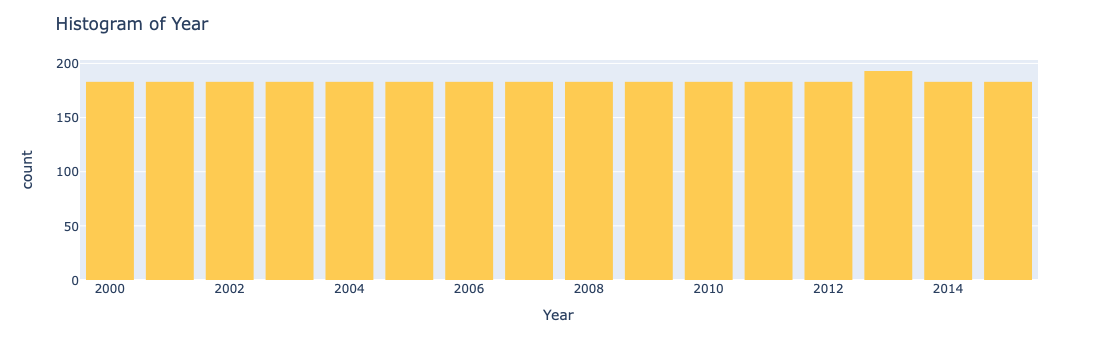

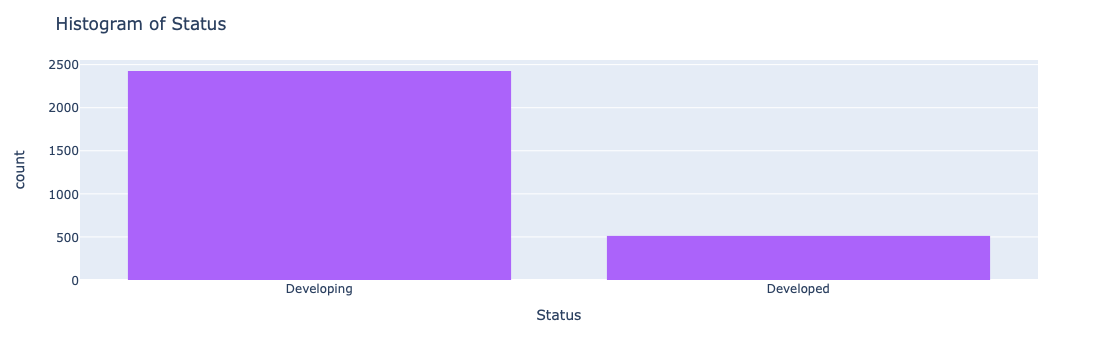

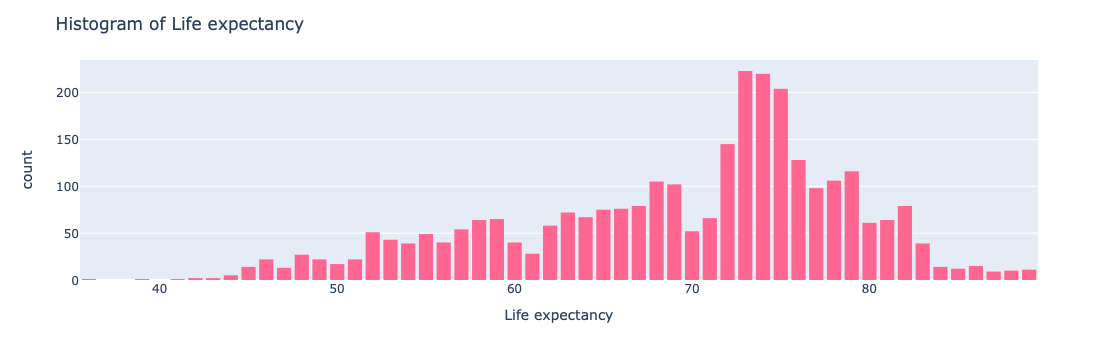

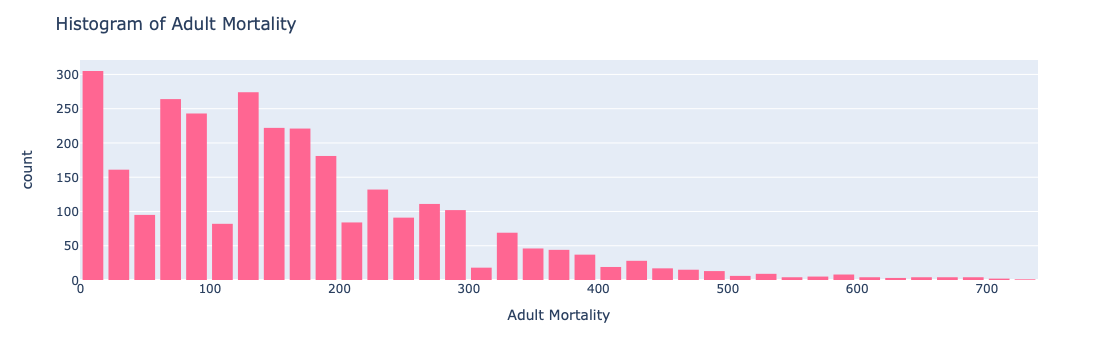

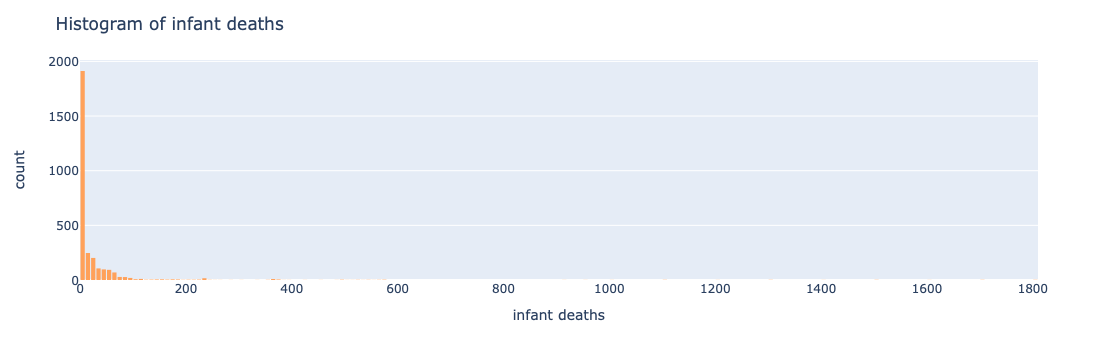

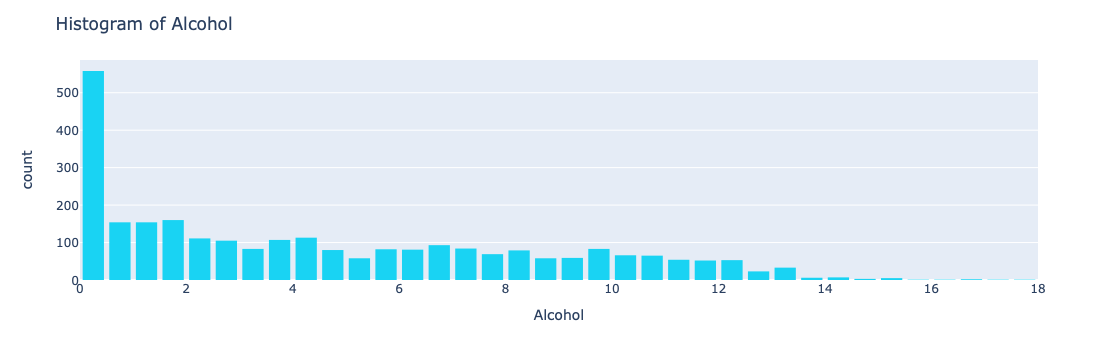

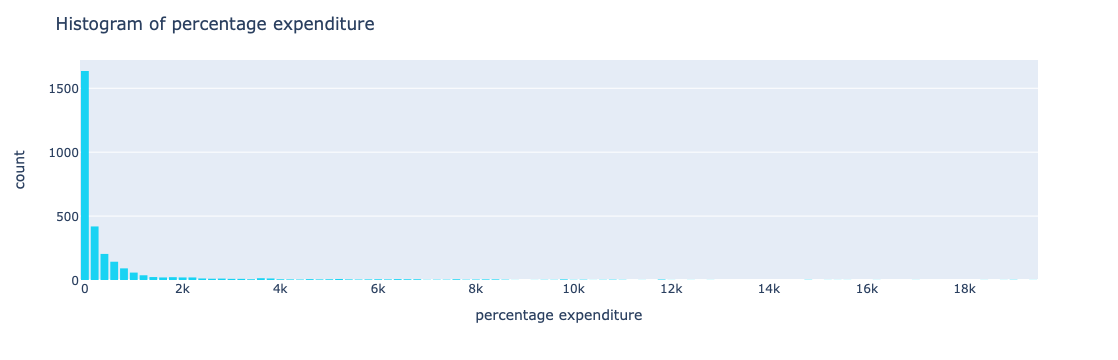

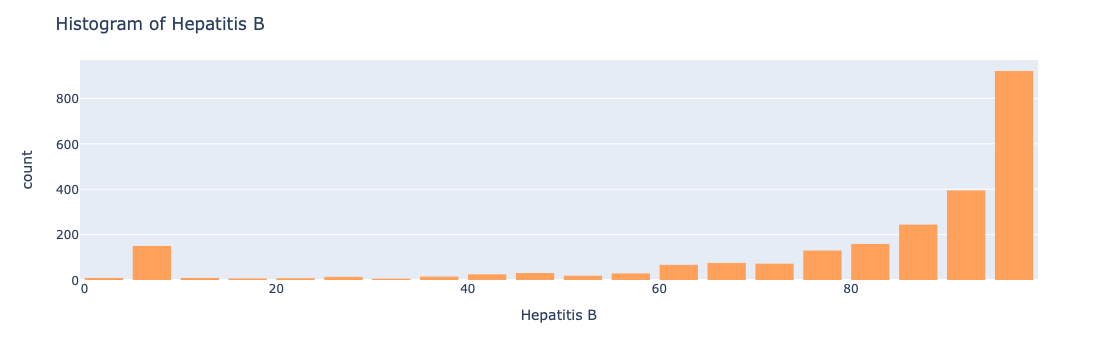

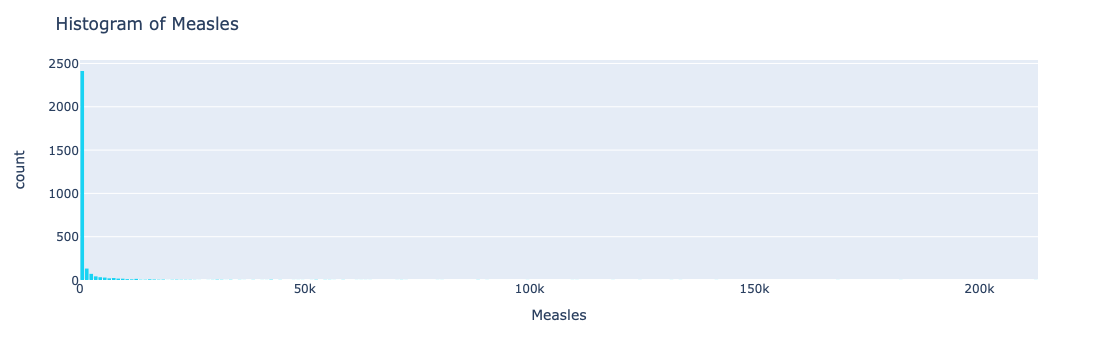

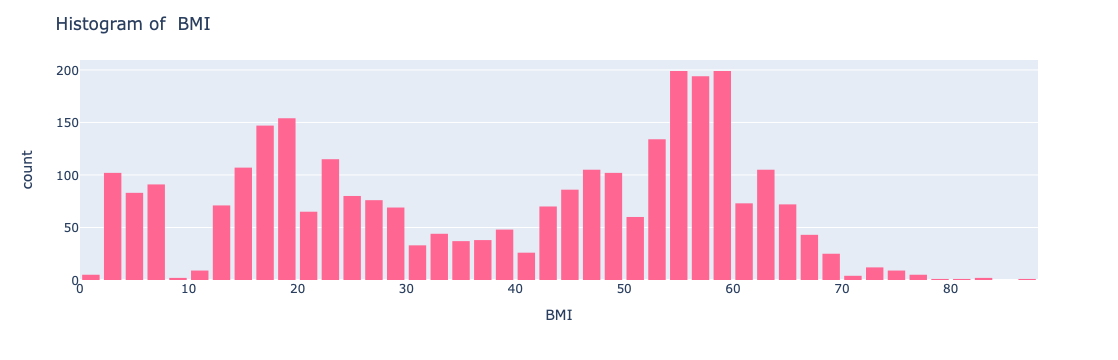

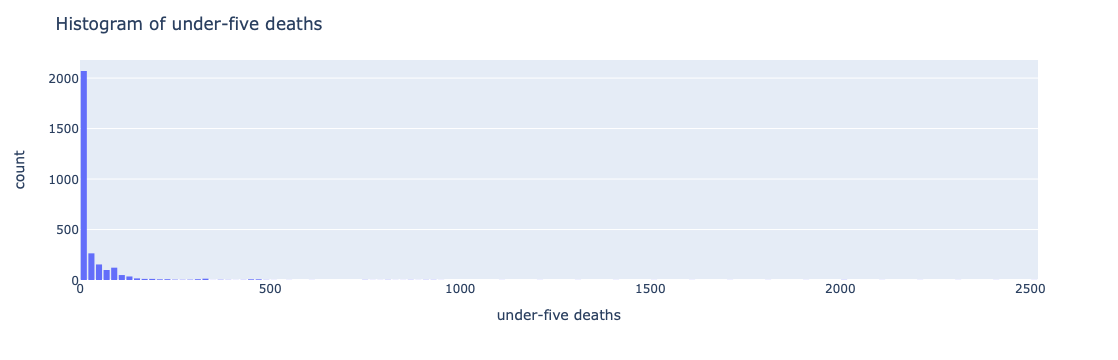

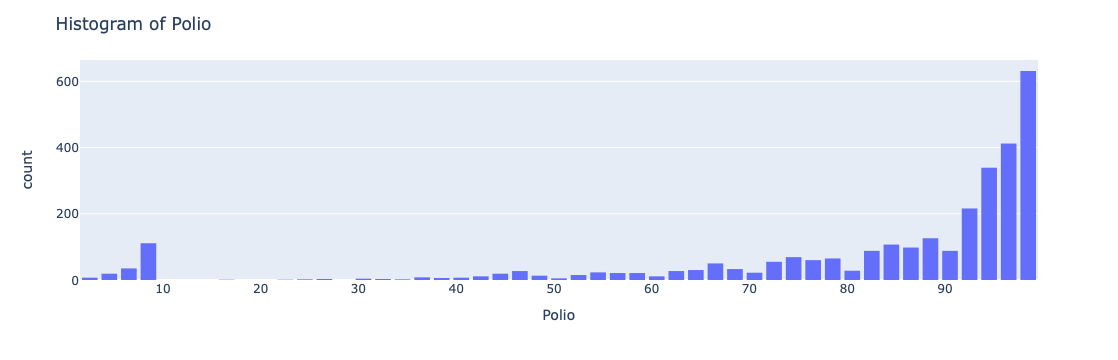

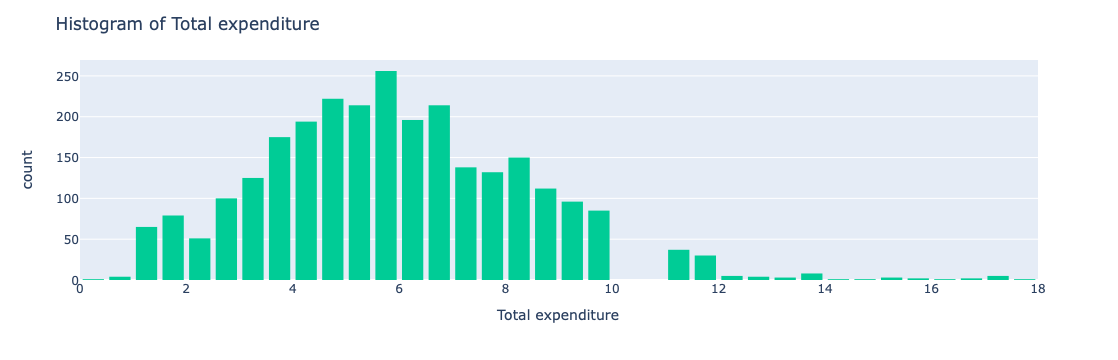

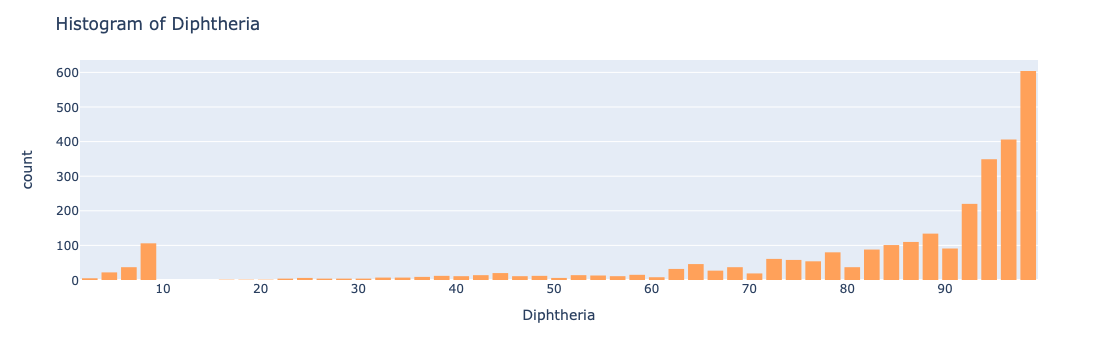

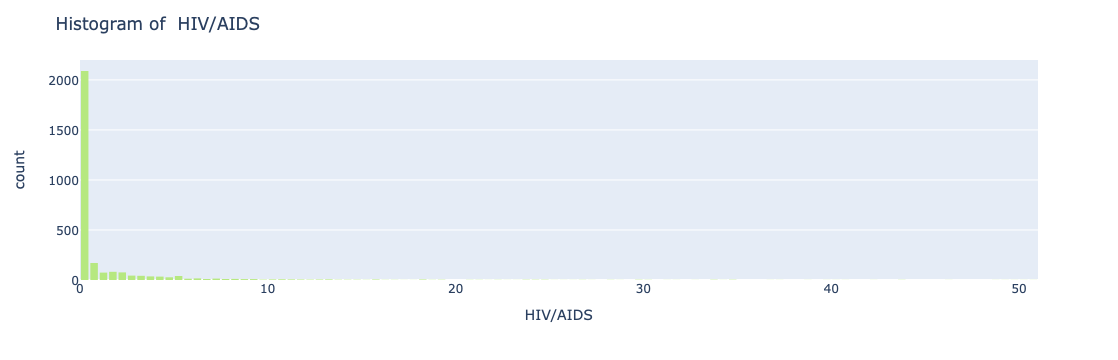

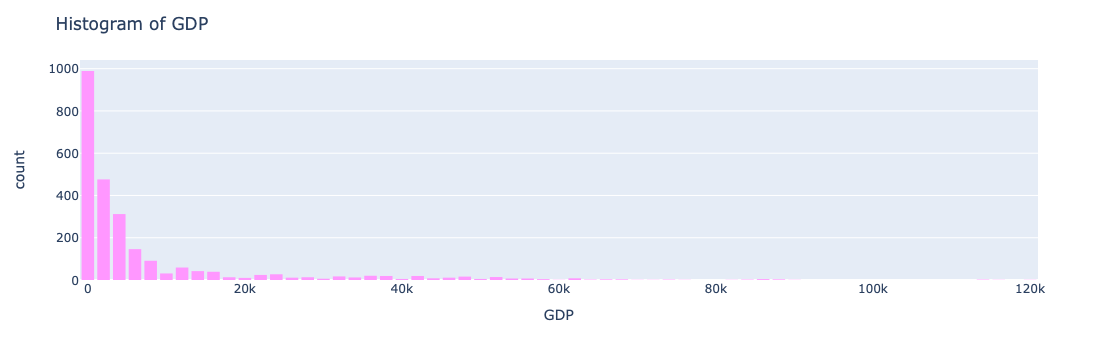

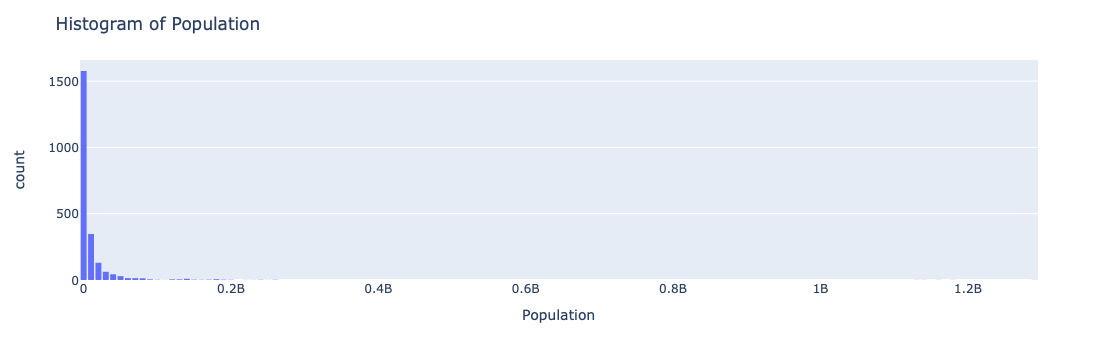

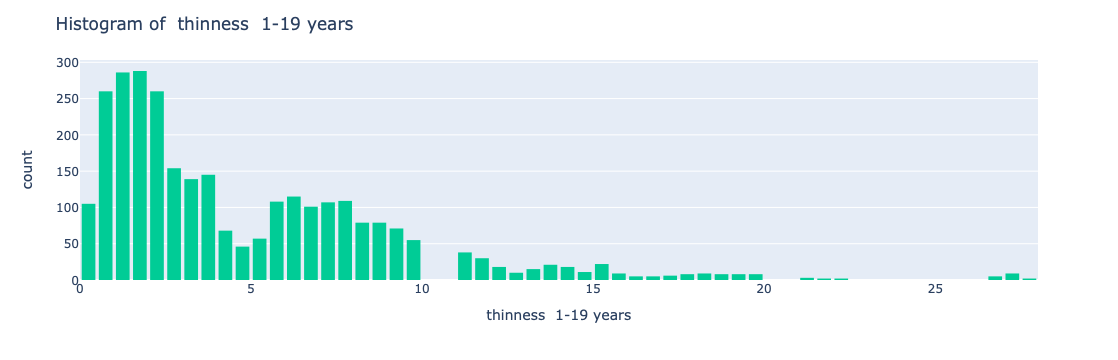

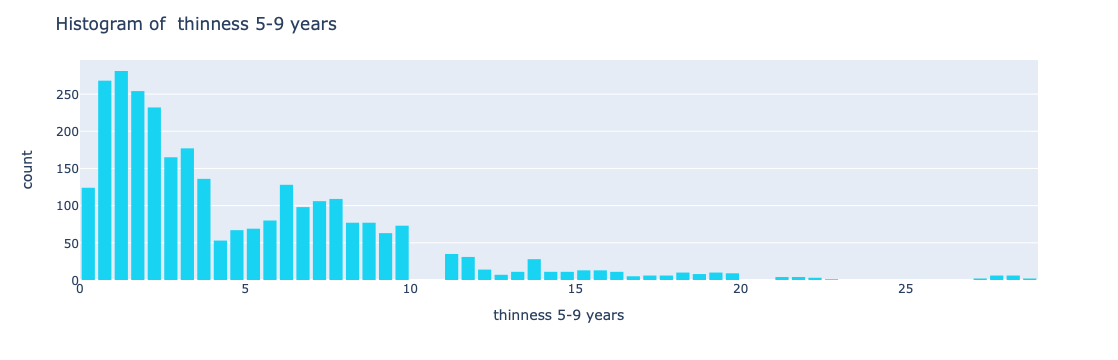

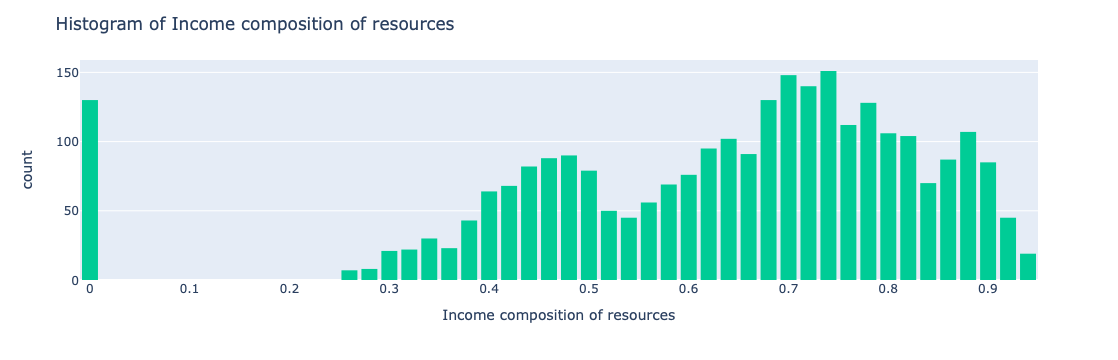

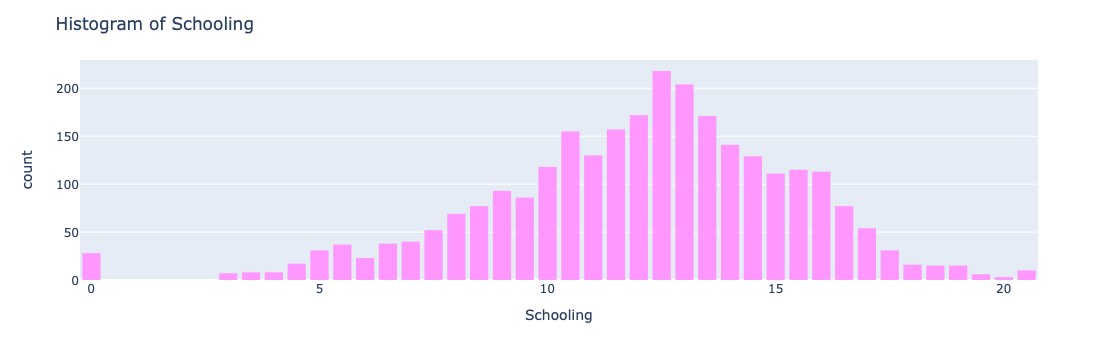

In [14]:
for column in plots :
    plot_histogram(df_train, column)

As we will try to predict life expectancy, let's have a more precise description 

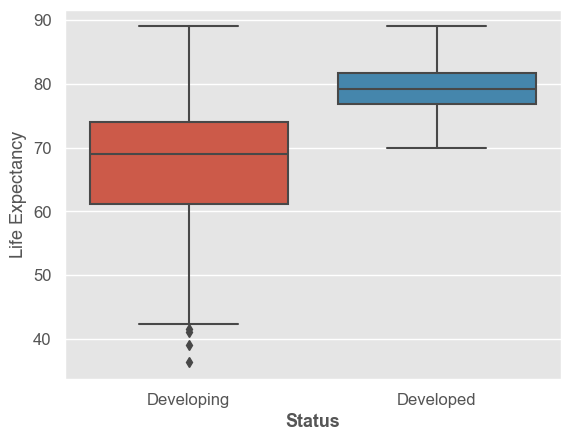

In [16]:
sns.boxplot(x= df_train["Status"],y = df_train['Life expectancy '],fliersize=5)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
plt.xlabel("Status", fontsize=13, fontweight="bold")
plt.show()

As we can see, the more the country is developed, the highest life expectancy is.
Let's see if we can find correlation with GDP (Gross Domestic Product per capita (in USD))

Let's dig further, and analyse the population number.

In [20]:
plots_num = ['Year', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
             'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

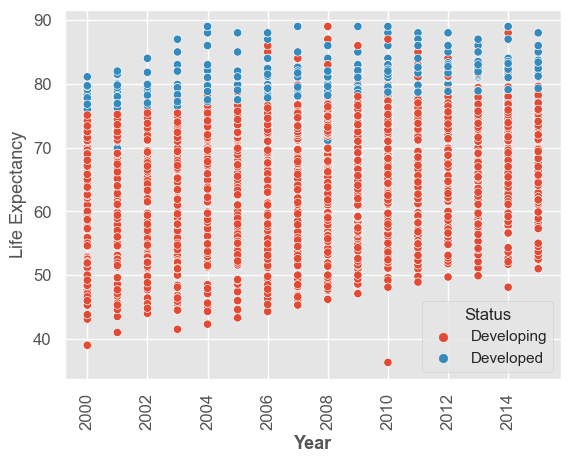

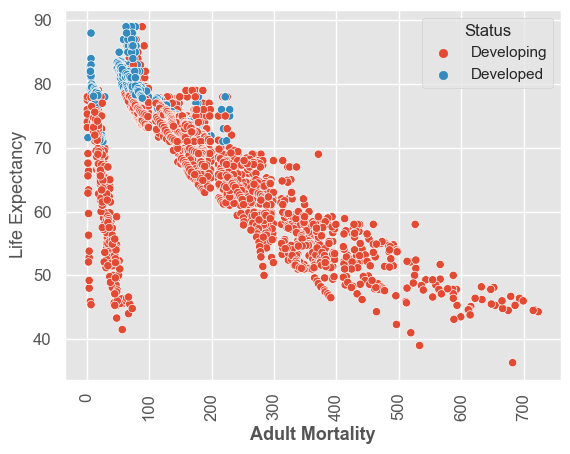

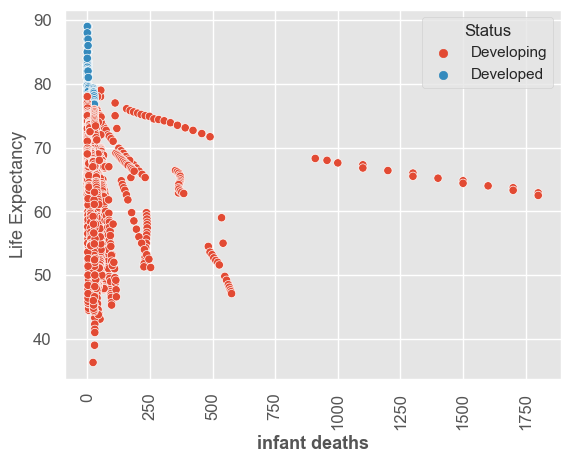

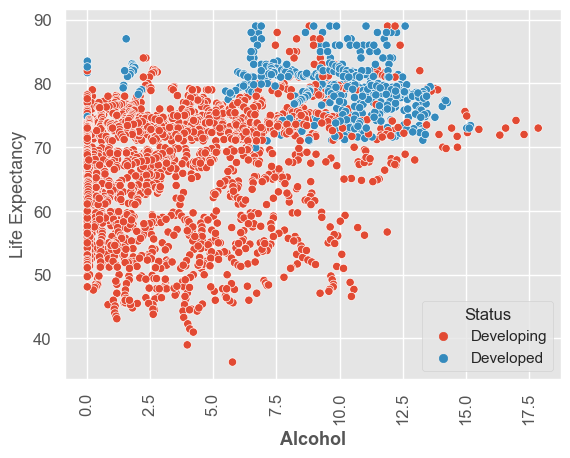

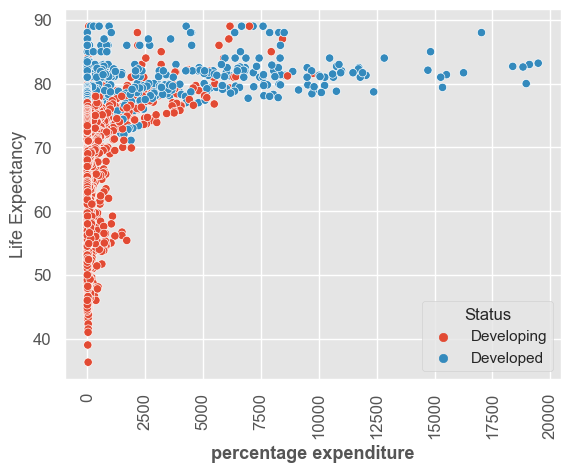

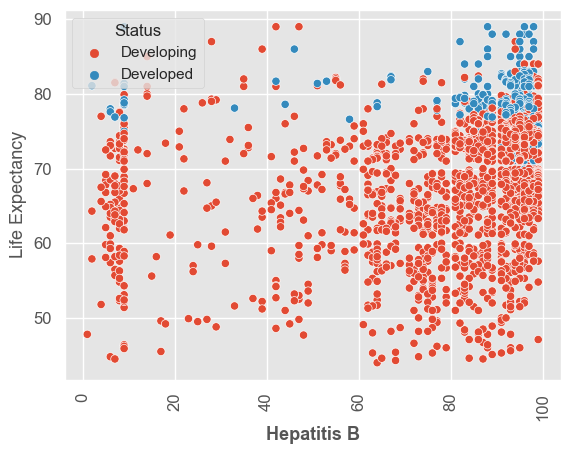

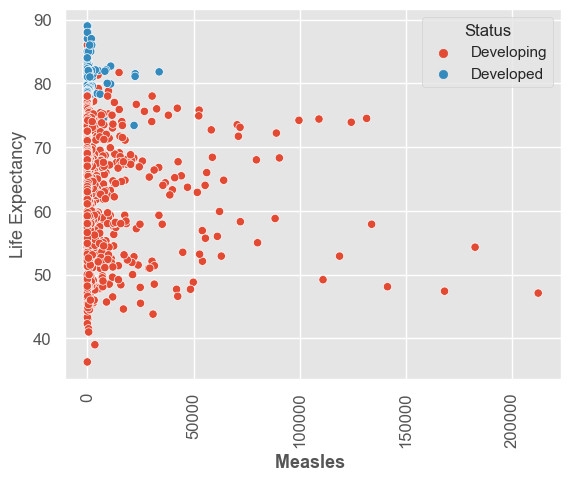

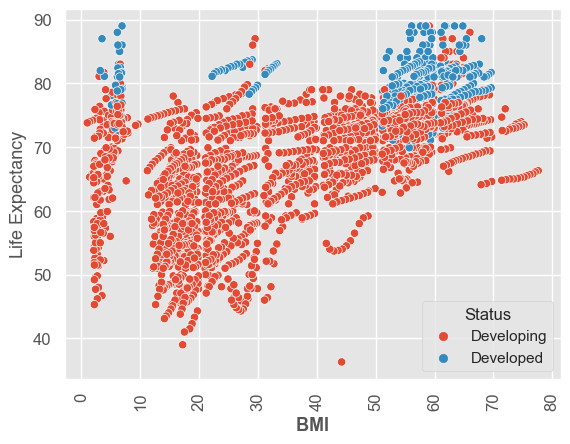

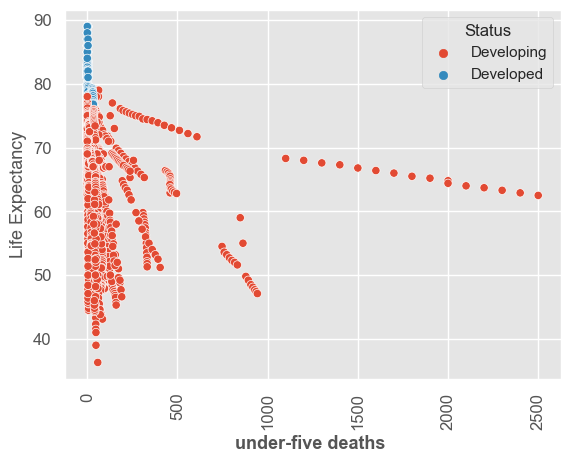

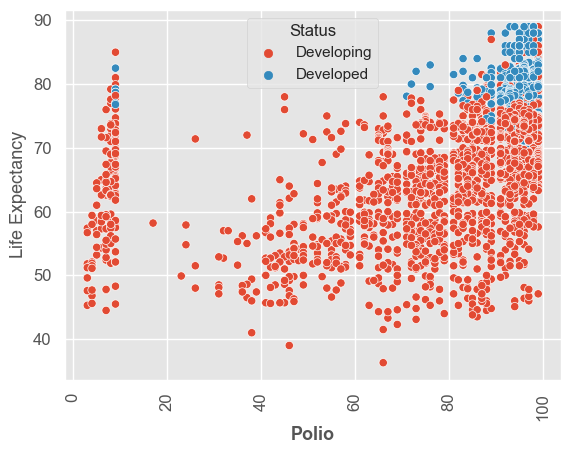

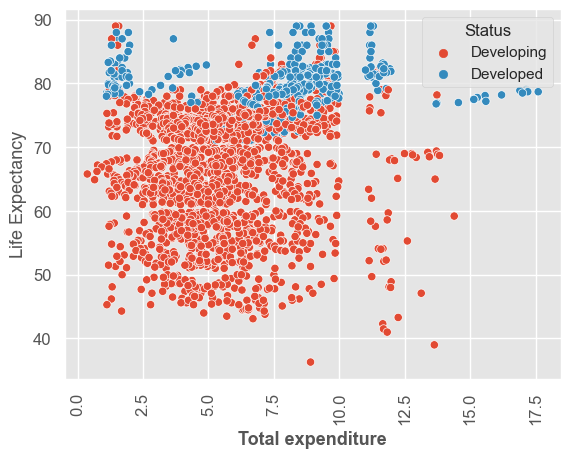

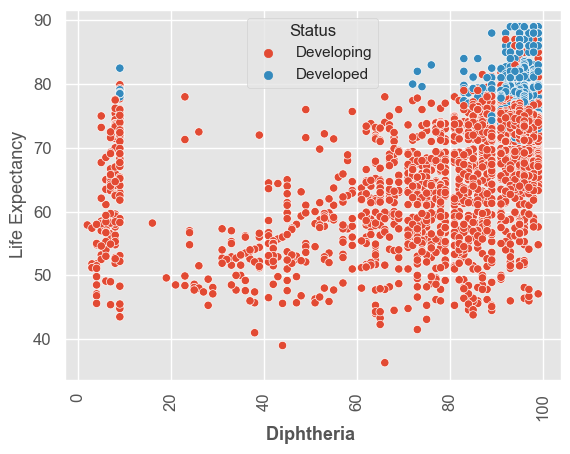

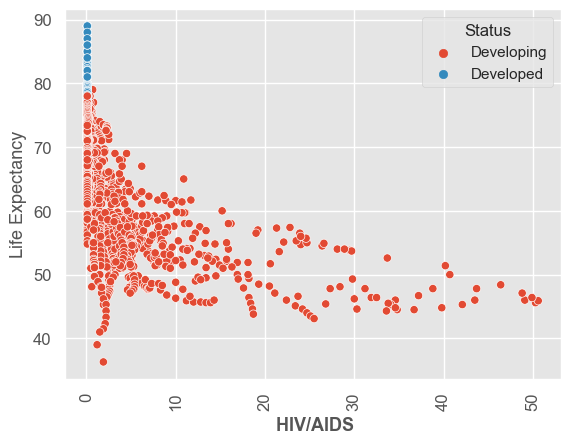

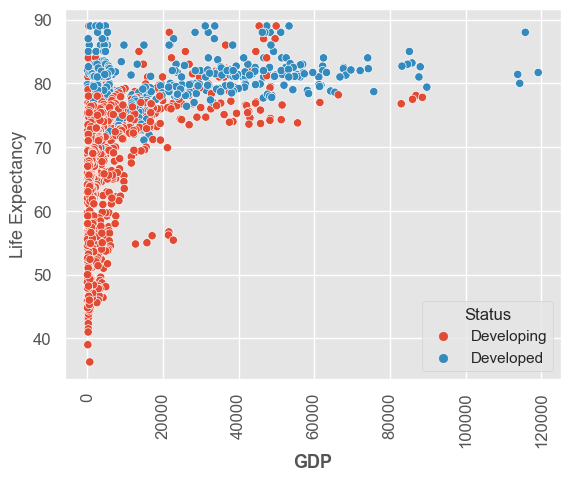

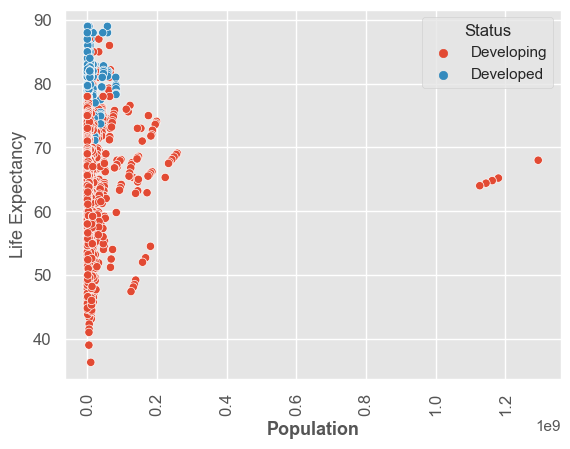

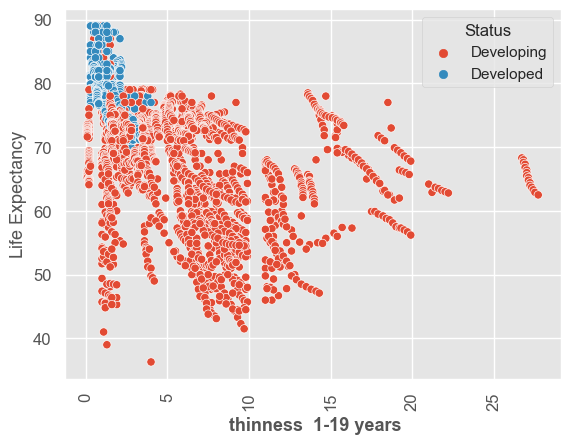

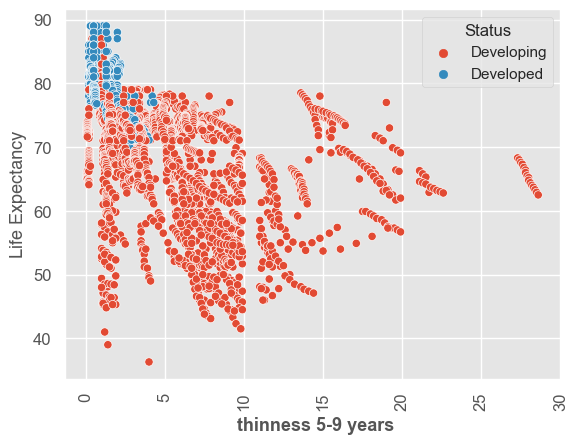

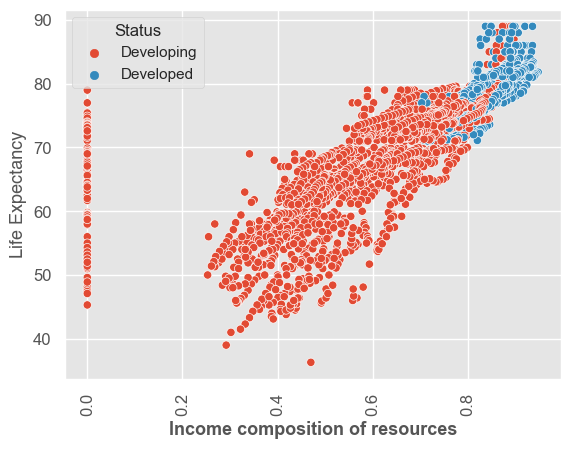

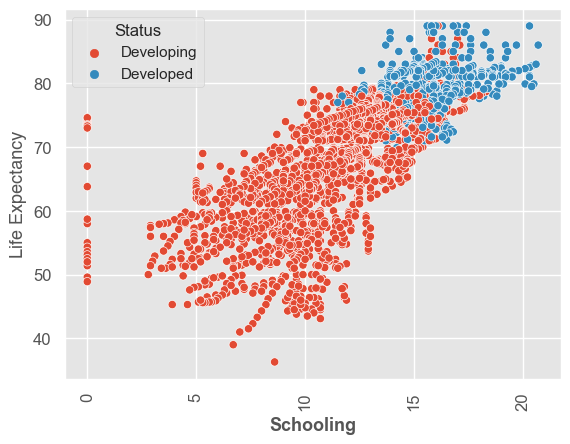

In [21]:
for column in plots_num:
    sns.scatterplot(x= df_train[column], y= df_train['Life expectancy '], hue= df_train['Status'])
    plt.xticks(rotation=90, fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
    plt.xlabel(column, fontsize=13, fontweight="bold")
    plt.show()


We can defenitely observe that developped countries have a highest life expectancy.  We can point out, that developped countries, having more schooling, higher GDP, higher expenditures and are less exposed to diseases have an actual higher life expectancy.

There are defenitely correlations between the features of our data. Let's implement a model that will try to predict life expectancy, and in the mean time see the features importance.

But first of all, let's deal with the missing values !!

### Preprocessing

I think it's interesting to fill the NaN values in a logical way. We're gonna fill the missing values with the median value of the corresponding Country and if not possible the global median value.

In [22]:
columns_to_fill = df_train.columns[df_train.isna().any()].tolist()
global_medians = df_train[columns_to_fill].median()

df_train_filled = df_train.copy()
#for col in columns_to_fill:
    #country_median = df_train.groupby('Country')[col].transform('median')
    #df_train_filled[col] = df_train_filled[col].fillna(country_median)
df_train_filled[columns_to_fill] = df_train_filled[columns_to_fill].fillna(global_medians)

In [23]:
df_train_filled.isna().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

To use a ML model, we need to get rid of strings/ object_type values. Let's encode Year and Status.

In [24]:
year_enc= LabelEncoder()
year_enc.fit(df_train_filled['Year'])
df_train_filled['Year']= year_enc.transform(df_train_filled['Year'])
df_train_filled['Year'].astype("int64")

0       15
1       14
2       13
3       12
4       11
        ..
2933     4
2934     3
2935     2
2936     1
2937     0
Name: Year, Length: 2938, dtype: int64

In [25]:
df_train_filled['Year'].unique()

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [26]:
status_enc= LabelEncoder()
status_enc.fit(df_train_filled['Status'])
df_train_filled['Status']= status_enc.transform(df_train_filled['Status'])
df_train_filled['Status'].astype("int64")

0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 2938, dtype: int64

In [33]:
df_train_filled['Status'].value_counts()

Status
1    2426
0     512
Name: count, dtype: int64

In [30]:
df_train_filled.head()

Year  Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0    15       1             65.00           263.00             62     0.01   
1    14       1             59.90           271.00             64     0.01   
2    13       1             59.90           268.00             66     0.01   
3    12       1             59.50           272.00             69     0.01   
4    11       1             59.20           275.00             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0                   71.28        65.00      1154  19.10  ...   6.00   
1                   73.52        62.00       492  18.60  ...  58.00   
2                   73.22        64.00       430  18.10  ...  62.00   
3                   78.18        67.00      2787  17.60  ...  67.00   
4                    7.10        68.00      3013  17.20  ...  68.00   

   Total expenditure  Diphtheria    HIV/AIDS    GDP  Population  \
0               8.16        65.00       0.10 584.26 33736494.00   
1               8.18        62.00       0.10 612.70   327582.00   
2               8.13        64.00       0.10 631.74 31731688.00   
3               8.52        67.00       0.10 669.96  3696958.00   
4               7.87        68.00       0.10  63.54  2978599.00   

    thinness  1-19 years   thinness 5-9 years  \
0                  17.20                17.30   
1                  17.50                17.50   
2                  17.70                17.70   
3                  17.90                18.00   
4                  18.20                18.20   

   Income composition of resources  Schooling  
0                             0.48      10.10  
1                             0.48      10.00  
2                             0.47       9.90  
3                             0.46       9.80  
4                             0.45       9.50  

[5 rows x 21 columns]

In [34]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.01  
selector = VarianceThreshold(threshold)
selector.fit(df_train_filled)

relevant_features = selector.get_support(indices=True)

df_relevant = df_train_filled.iloc[:, relevant_features]

In [36]:
correlation_matrix = df_relevant.corr().abs()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

masked_correlation = correlation_matrix.mask(mask)

correlation_threshold = 0.8 
highly_correlated_features = np.where(masked_correlation > correlation_threshold)

for i, j in zip(highly_correlated_features[0], highly_correlated_features[1]):
    print(f"Features {df_relevant.columns[i]} and {df_relevant.columns[j]} are highly correlated.")

Features under-five deaths  and infant deaths are highly correlated.
Features GDP and percentage expenditure are highly correlated.
Features  thinness 5-9 years and  thinness  1-19 years are highly correlated.


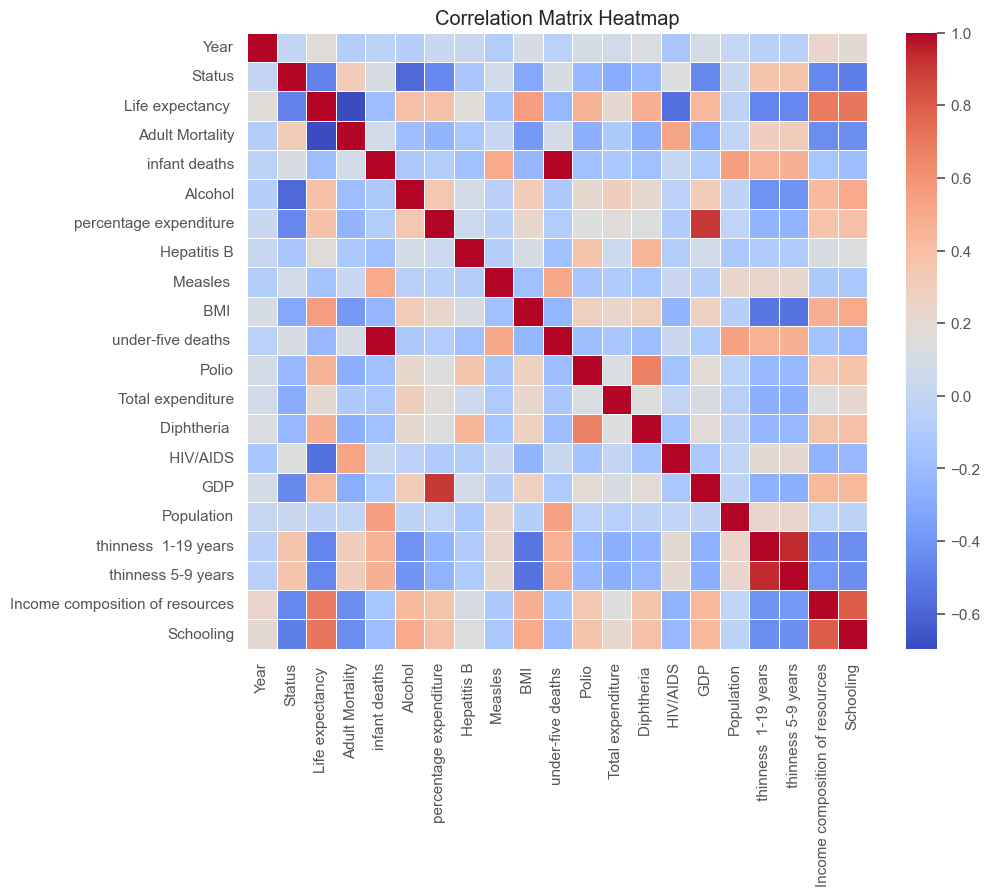

In [38]:
correlation_matrix = df_relevant.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [39]:
df = df_train_filled.drop(['infant deaths', 'percentage expenditure', ' thinness 5-9 years'], axis=1)

Let's save our cleaned data in a new csv document

In [40]:
#df.to_csv('data_train_preprocessed.csv', index=False)

### Let's beging

In [41]:
data = pd.read_csv('data_train_preprocessed.csv')

<Axes: >

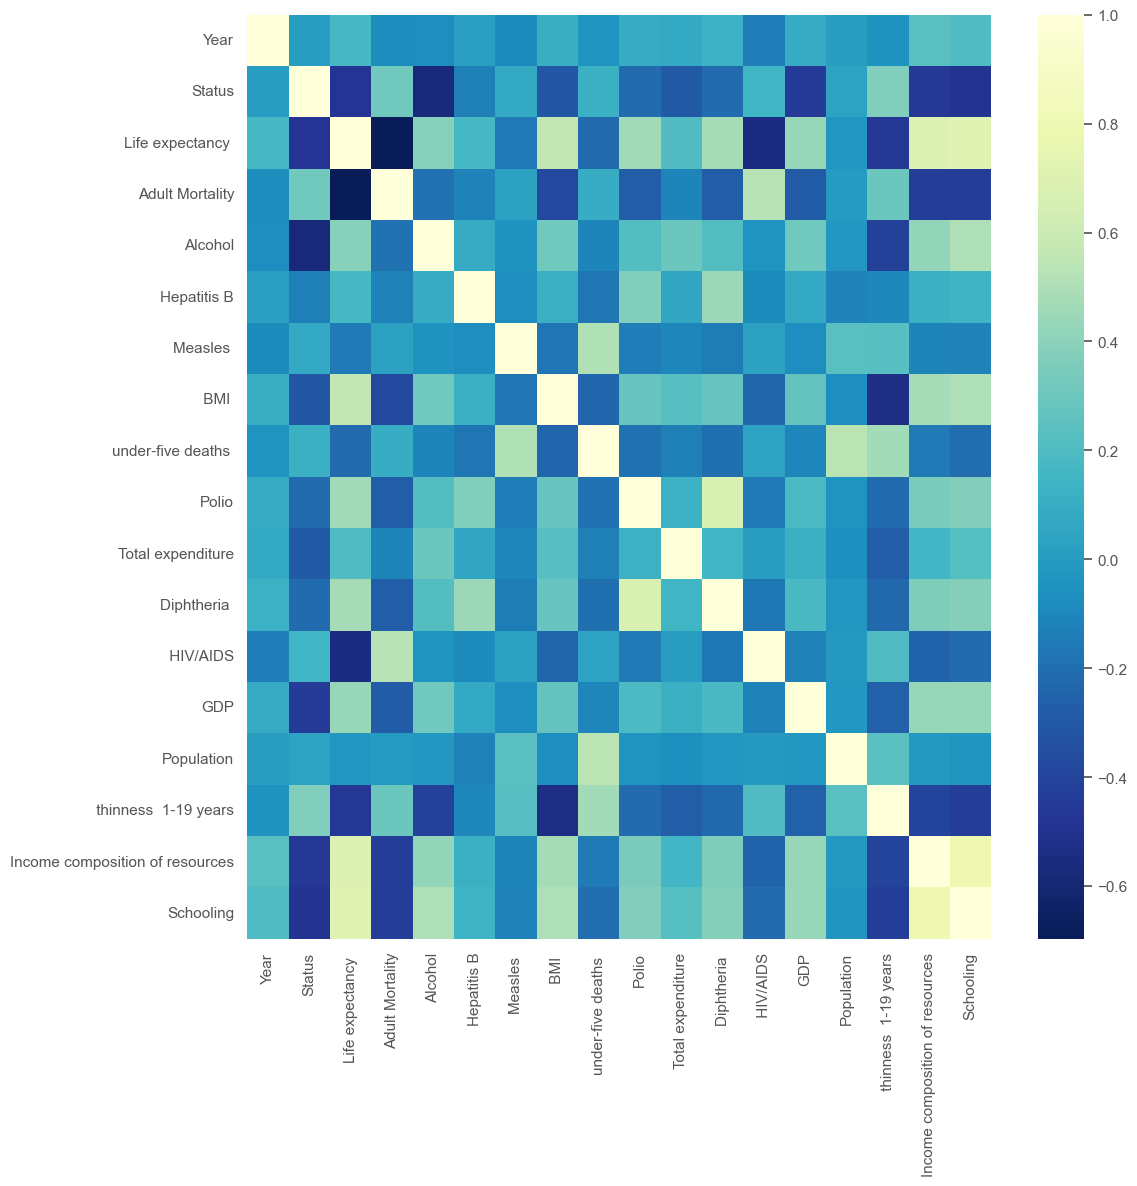

In [42]:
plt.figure(figsize= [12,12])
sns.heatmap(data.corr(), annot=False, cmap= "YlGnBu_r")

### Splitting our data 

In [43]:
X = data.drop(['Life expectancy '], axis =1)
y = data['Life expectancy ']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 17), (588, 17), (2350,), (588,))

### Models training and metrics

As we are here trying to predict continuous values, that is the Life Expectancy, let's try different Algorithms suited for this use case.

In [46]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.model_selection import cross_val_score


In [47]:
algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), 
              LinearRegression(), SVR(), XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)]


In [48]:
results_list = []

for alg in algorithms:
    model = alg
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    rmse_train = np.sqrt(mse(y_train, y_pred_train))
    rmse_test = np.sqrt(mse(y_test, y_pred_test))
    results_list.append({'Algorithm': str(alg), 'Metric': 'Root Mean Square Error', 'Train Value': rmse_train, 'Test Value': rmse_test})

    mae_train = mae(y_train, y_pred_train)
    mae_test = mae(y_test, y_pred_test)
    results_list.append({'Algorithm': str(alg), 'Metric': 'Mean Absolute Error', 'Train Value': mae_train, 'Test Value': mae_test})

    mape_train = mape(y_train, y_pred_train)
    mape_test = mape(y_test, y_pred_test)
    results_list.append({'Algorithm': str(alg), 'Metric': 'Mean Absolute Percentage Error', 'Train Value': mape_train, 'Test Value': mape_test})

df_results = pd.DataFrame(results_list)


In [49]:
df_results.head(5)

Algorithm                          Metric  Train Value  \
0  RandomForestRegressor()          Root Mean Square Error         0.71   
1  RandomForestRegressor()             Mean Absolute Error         0.44   
2  RandomForestRegressor()  Mean Absolute Percentage Error         0.01   
3      AdaBoostRegressor()          Root Mean Square Error         2.92   
4      AdaBoostRegressor()             Mean Absolute Error         2.36   

   Test Value  
0        1.66  
1        1.08  
2        0.02  
3        2.97  
4        2.37

### Evaluation 

    Why use the Mean Absolute Error (MAE) as our metric for models evaluation ?

- MAE is used for regression tasks where the goal is to predict a continuous numerical value.
- For Regression Tasks, MAE measures the average absolute difference between the predicted values and the actual values.
- It provides a measure of the average magnitude of errors made by the model.

    Main advantages : 
- It is less sensitive to outliers compared to other regression metrics like Mean Squared Error (MSE).
- MAE is reported in the same scale as the target variable.
- MAE is less sensitive to outliers and provides a more robust measure of average prediction error.


In [50]:
sorted_results = df_results.groupby("Metric").apply(lambda x: x.sort_values('Test Value', ascending=True))

In [51]:
sorted_results.head(30)

Algorithm  \
Metric                                                                                 
Mean Absolute Error            1                             RandomForestRegressor()   
                               7                         GradientBoostingRegressor()   
                               19  XGBRegressor(base_score=None, booster=None, ca...   
                               10                            DecisionTreeRegressor()   
                               4                                 AdaBoostRegressor()   
                               13                                 LinearRegression()   
                               16                                              SVR()   
Mean Absolute Percentage Error 2                             RandomForestRegressor()   
                               8                         GradientBoostingRegressor()   
                               20  XGBRegressor(base_score=None, booster=None, ca...   
                               11                            DecisionTreeRegressor()   
                               5                                 AdaBoostRegressor()   
                               14                                 LinearRegression()   
                               17                                              SVR()   
Root Mean Square Error         0                             RandomForestRegressor()   
                               6                         GradientBoostingRegressor()   
                               18  XGBRegressor(base_score=None, booster=None, ca...   
                               9                             DecisionTreeRegressor()   
                               3                                 AdaBoostRegressor()   
                               12                                 LinearRegression()   
                               15                                              SVR()   

                                                           Metric  \
Metric                                                              
Mean Absolute Error            1              Mean Absolute Error   
                               7              Mean Absolute Error   
                               19             Mean Absolute Error   
                               10             Mean Absolute Error   
                               4              Mean Absolute Error   
                               13             Mean Absolute Error   
                               16             Mean Absolute Error   
Mean Absolute Percentage Error 2   Mean Absolute Percentage Error   
                               8   Mean Absolute Percentage Error   
                               20  Mean Absolute Percentage Error   
                               11  Mean Absolute Percentage Error   
                               5   Mean Absolute Percentage Error   
                               14  Mean Absolute Percentage Error   
                               17  Mean Absolute Percentage Error   
Root Mean Square Error         0           Root Mean Square Error   
                               6           Root Mean Square Error   
                               18          Root Mean Square Error   
                               9           Root Mean Square Error   
                               3           Root Mean Square Error   
                               12          Root Mean Square Error   
                               15          Root Mean Square Error   

                                   Train Value  Test Value  
Metric                                                      
Mean Absolute Error            1          0.44        1.08  
                               7          1.38        1.51  
                               19         1.40        1.52  
                               10         0.00        1.62  
                               4          2.36        2.37  
                               13  

In [52]:
for alg in algorithms:
    scores = cross_val_score(alg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    print(f'{alg.__class__.__name__}: Mean MAE: {-scores.mean()}, Std: {scores.std()}')

RandomForestRegressor: Mean MAE: 1.2577097872340426, Std: 0.07105442485350995
AdaBoostRegressor: Mean MAE: 2.4229373229415736, Std: 0.12110797497076342
GradientBoostingRegressor: Mean MAE: 1.6512570617075806, Std: 0.09613480527787203
DecisionTreeRegressor: Mean MAE: 1.7153617021276595, Std: 0.09656006464476367
LinearRegression: Mean MAE: 3.146068296235339, Std: 0.05411601521535463
SVR: Mean MAE: 7.453568452684197, Std: 0.3682618646024698
XGBRegressor: Mean MAE: 1.6504506128189411, Std: 0.08749876216461308


    As we can see from those results, our Random Forest Regressor gives us the best results.
    Let's embetter the Random Forest results !

In [53]:
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor()

In [54]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rfr, param_grid=param_dist, scoring='neg_mean_absolute_error', cv=5)

The reason for negation is that the convention in scikit-learn is to maximize the scoring metric, but in the case of error metrics like MAE, lower values are better. By negating the error metric, the optimization process seeks to find hyperparameters that result in a lower (i.e., more negative) mean absolute error.

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 25, 30, 35, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_absolute_error')

In [56]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [58]:
y_pred = best_model.predict(X_test)

In [59]:
mae_rfr = mae(y_test, y_pred)
print(f"Best Model Mean Absolute Error on Test Set: {mae_rfr}")
print(f"Best Hyperparameters: {best_params}")

Best Model Mean Absolute Error on Test Set: 1.0853673469387761
Best Hyperparameters: {'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


Text(0.5, 0, 'Actual')

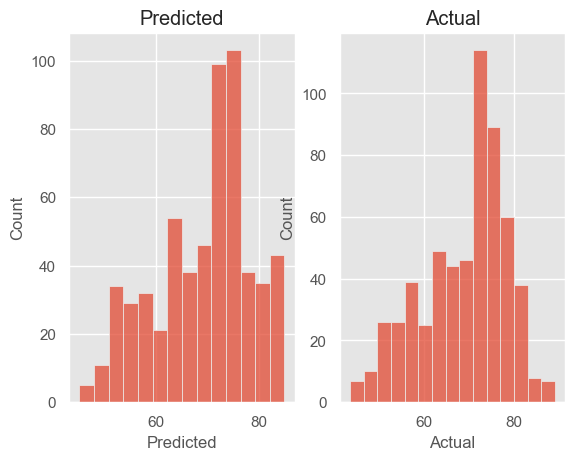

In [60]:
plt.subplot(1,2,1)
sns.histplot(y_pred)
plt.title("Predicted")
plt.xlabel("Predicted")
plt.subplot(1,2,2)
sns.histplot(y_test)
plt.title("Actual")
plt.xlabel("Actual")

### Let's predict life expectancy with our testing data

In [75]:
df_test = pd.read_csv('testing_data.csv')
df_test.head()

Country  Year      Status  Adult Mortality  infant deaths  \
0  Syrian Arab Republic  2006  Developing           123.00              8   
1               Croatia  2006   Developed           113.00              0   
2            Montenegro  2007  Developing           125.00              0   
3               Bahrain  2014  Developing             7.00              0   
4                 Kenya  2000  Developing           428.00             77   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0     0.97                  122.65        83.00       517  48.50  ...   
1    11.83                 1555.65          NaN         1  58.10  ...   
2     4.98                  678.52         9.00         0  57.20  ...   
3     1.57                  367.26        98.00        46  62.90  ...   
4     1.51                    0.68          NaN     21002  14.40  ...   

   Total expenditure  Diphtheria    HIV/AIDS      GDP  Population  \
0               3.78         8.00       0.10  1762.25 18914977.00   
1               6.95        96.00       0.10 11363.42      444.00   
2               6.74        92.00       0.10  5957.15   615875.00   
3               4.98        98.00       0.10 24983.38         NaN   
4               4.68        82.00      18.10    43.98  3145483.00   

    thinness  1-19 years   thinness 5-9 years  \
0                   6.40                 6.30   
1                   1.80                 1.80   
2                   2.10                 2.20   
3                   6.10                 6.00   
4                   9.20                 9.10   

   Income composition of resources  Schooling  Row_id  
0                             0.64      11.40       0  
1                             0.78      13.90       1  
2                             0.76      13.60       2  
3                             0.82      14.50       3  
4                             0.45       8.40       4  

[5 rows x 22 columns]

In [76]:
df_test.isna().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      4
infant deaths                        0
Alcohol                             58
percentage expenditure               0
Hepatitis B                        183
Measles                              0
 BMI                                10
under-five deaths                    0
Polio                                8
Total expenditure                   68
Diphtheria                           8
 HIV/AIDS                            0
GDP                                151
Population                         208
 thinness  1-19 years               10
 thinness 5-9 years                 10
Income composition of resources     57
Schooling                           54
Row_id                               0
dtype: int64

In [77]:
columns_to_fill = df_test.columns[df_test.isna().any()].tolist()

In [78]:
global_medians = df_test[columns_to_fill].median()

df_test_filled = df_test.copy()
df_test_filled[columns_to_fill] = df_test_filled[columns_to_fill].fillna(global_medians)

In [79]:
df_test_filled = df_test_filled.drop(['Country','Row_id','infant deaths', 'percentage expenditure', ' thinness 5-9 years' ], axis = 1)

In [80]:
df_test_filled['Year'] = year_enc.fit_transform(df_test_filled['Year']).astype("int64")

In [81]:
df_test_filled['Status'] = status_enc.fit_transform(df_test_filled['Status']).astype("int64")

In [82]:
df_test_ready = df_test_filled

In [83]:
df_test_ready.head()

Year  Status  Adult Mortality  Alcohol  Hepatitis B  Measles    BMI   \
0     6       1           123.00     0.97        83.00       517  48.50   
1     6       0           113.00    11.83        92.00         1  58.10   
2     7       1           125.00     4.98         9.00         0  57.20   
3    14       1             7.00     1.57        98.00        46  62.90   
4     0       1           428.00     1.51        92.00     21002  14.40   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  10  83.00               3.78         8.00       0.10   
1                   0  96.00               6.95        96.00       0.10   
2                   0  92.00               6.74        92.00       0.10   
3                   0  98.00               4.98        98.00       0.10   
4                 121   8.00               4.68        82.00      18.10   

       GDP  Population   thinness  1-19 years  \
0  1762.25 18914977.00                   6.40   
1 11363.42      444.00                   1.80   
2  5957.15   615875.00                   2.10   
3 24983.38  1390915.00                   6.10   
4    43.98  3145483.00                   9.20   

   Income composition of resources  Schooling  
0                             0.64      11.40  
1                             0.78      13.90  
2                             0.76      13.60  
3                             0.82      14.50  
4                             0.45       8.40

In [84]:
df_test_ready.shape

(882, 17)

In [85]:
test_pred = best_model.predict(df_test_ready)

In [74]:
len(test_pred)

882

In [87]:
df_test_ready['Life expectancy predicted'] = test_pred

In [88]:
df_test_ready.head()

Year  Status  Adult Mortality  Alcohol  Hepatitis B  Measles    BMI   \
0     6       1           123.00     0.97        83.00       517  48.50   
1     6       0           113.00    11.83        92.00         1  58.10   
2     7       1           125.00     4.98         9.00         0  57.20   
3    14       1             7.00     1.57        98.00        46  62.90   
4     0       1           428.00     1.51        92.00     21002  14.40   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  10  83.00               3.78         8.00       0.10   
1                   0  96.00               6.95        96.00       0.10   
2                   0  92.00               6.74        92.00       0.10   
3                   0  98.00               4.98        98.00       0.10   
4                 121   8.00               4.68        82.00      18.10   

       GDP  Population   thinness  1-19 years  \
0  1762.25 18914977.00                   6.40   
1 11363.42      444.00                   1.80   
2  5957.15   615875.00                   2.10   
3 24983.38  1390915.00                   6.10   
4    43.98  3145483.00                   9.20   

   Income composition of resources  Schooling  Life expectancy predicted  
0                             0.64      11.40                      73.11  
1                             0.78      13.90                      75.85  
2                             0.76      13.60                      75.17  
3                             0.82      14.50                      76.20  
4                             0.45       8.40                      52.99

Let's decode our data to see the life expectancy predicted of the different countries, years and wether they're developped or developping

In [90]:
df_test_ready['Year'] = year_enc.inverse_transform(df_test_ready['Year'])
df_test_ready['Status'] = status_enc.inverse_transform(df_test_ready['Status'])

In [92]:
df_test_ready.head()

Year      Status  Adult Mortality  Alcohol  Hepatitis B  Measles    BMI   \
0  2006  Developing           123.00     0.97        83.00       517  48.50   
1  2006   Developed           113.00    11.83        92.00         1  58.10   
2  2007  Developing           125.00     4.98         9.00         0  57.20   
3  2014  Developing             7.00     1.57        98.00        46  62.90   
4  2000  Developing           428.00     1.51        92.00     21002  14.40   

   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  10  83.00               3.78         8.00       0.10   
1                   0  96.00               6.95        96.00       0.10   
2                   0  92.00               6.74        92.00       0.10   
3                   0  98.00               4.98        98.00       0.10   
4                 121   8.00               4.68        82.00      18.10   

       GDP  Population   thinness  1-19 years  \
0  1762.25 18914977.00                   6.40   
1 11363.42      444.00                   1.80   
2  5957.15   615875.00                   2.10   
3 24983.38  1390915.00                   6.10   
4    43.98  3145483.00                   9.20   

   Income composition of resources  Schooling  Life expectancy predicted  
0                             0.64      11.40                      73.11  
1                             0.78      13.90                      75.85  
2                             0.76      13.60                      75.17  
3                             0.82      14.50                      76.20  
4                             0.45       8.40                      52.99

### Let's save our model in a pickle file to use later for our app

In [94]:
import pickle
model_path = 'model/RFRegressorTrained.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(best_model, model_file)